In [0]:
# to load the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# unzip and load sample videos from drive
!unzip drive/My\ Drive/PFE/001_050_Videos

In [0]:
# unzip the gaze history files
!unzip drive/My\ Drive/PFE/Gaze_txt_files

In [4]:
# read gaze history of viewer 3 while watching video 001
import pandas as pd
# here is the content of the gaze file
data = pd.read_csv('Gaze_txt_files/p003/001._2017-10-03-18-55_ori_0.txt', sep=",", header=None)
data.head()

,0,1,2,3,4,5,6,7
0,frame,1,forward,0.497905,0.517140,eye,0.493465,0.517563
1,frame,2,forward,0.497487,0.517143,eye,0.492758,0.517338
2,frame,3,forward,0.497631,0.517355,eye,0.492862,0.517596
3,frame,4,forward,0.497897,0.518135,eye,0.493187,0.517844
4,frame,5,forward,0.498073,0.518429,eye,0.493337,0.518636


In [5]:
# minimal value for each column
data.min(0)

0         frame
1             1
2       forward
3     0.0017467
4       0.43271
5           eye
6    0.00107484
7      0.333532
dtype: object

In [6]:
# maximal value for each column
data.max(0)

0       frame
1         487
2     forward
3    0.998913
4    0.533969
5         eye
6    0.999642
7     0.62089
dtype: object

In [0]:
# a function that return the center of gaze in pixel when giving the gaze_file and which frame of the video
def get_eye_position(gaze_file, frame):
  from sklearn import preprocessing
  file = pd.read_csv(gaze_file, sep=",", header=None)
  # take only the two last values that correspond to the eyes gaze
  x = file.values[:,-2:]
  # normalize the gaze position
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  # get the position in pixels
  x_pixeled = x_scaled * [960, 480]
  return x_pixeled[frame-1]

In [9]:
get_eye_position('Gaze_txt_files/p003/001._2017-10-03-18-55_ori_0.txt',5)

array([473.24962445, 309.19639446])

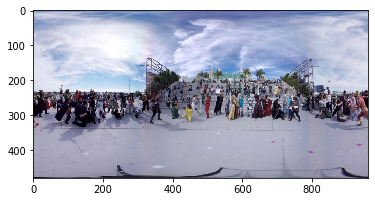

In [68]:
from matplotlib import pyplot as plt
# choose a frame to apply the gaussian window on
test_image = plt.imread("001/001.jpg")
plt.imshow(test_image)

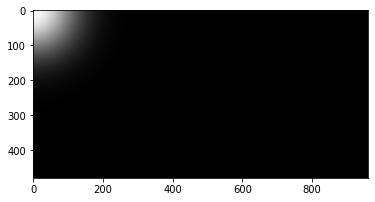

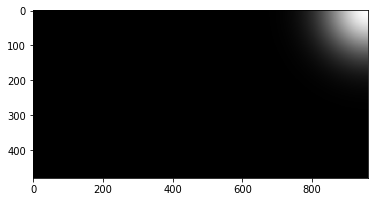

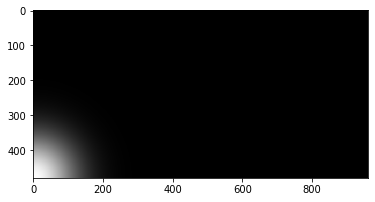

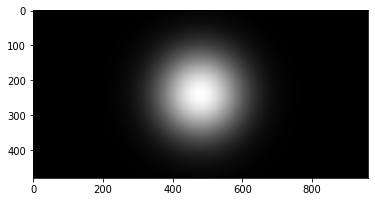

In [58]:
import numpy as np
from matplotlib import pyplot as plt
# a function to generate a gaussian mask when given the position of its center
def gauss_window(x_pos=480, y_pos=240):
  x, y = np.meshgrid(np.linspace(-x_pos,960-x_pos,960), np.linspace(-y_pos,480-y_pos,480))
  d = np.sqrt(x*x+y*y)
  # the FoV in a VR headset is about 100 degrees. This takes about 266 px horizontally since the panoramic scene is 360 degrees in 960 px.
  # Therefore we take a value of sigma that can cover this FoV
  sigma, mu = 85.0, 0
  channel = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
  return np.stack((channel,) * 3, axis=-1)
# Check that the final gaussian window makes sense.
# ploting few examples , , , .
# assuming the gaze position at (0, 0)
plt.imshow(gauss_window(0,0))
plt.show()
# assuming the gaze position at (IMG_WIDTH, 0)
plt.imshow(gauss_window(960,0))
plt.show()
# assuming the gaze position at (0, IMG_HEIGHT)
plt.imshow(gauss_window(0,480))
plt.show()
# assuming the gaze position at (IMG_WIDTH/2, IMG_HEIGHT/2)
plt.imshow(gauss_window(480,240))
plt.show()

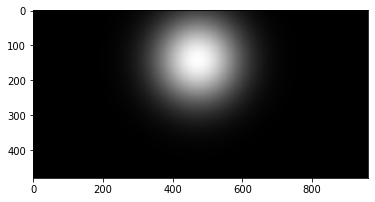

In [60]:
test_eye_pos = get_eye_position('Gaze_txt_files/p003/006._2017-10-03-18-59_ori_0.txt',1)
test_mask = gauss_window(test_eye_pos[0], test_eye_pos[1])
plt.imshow(test_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


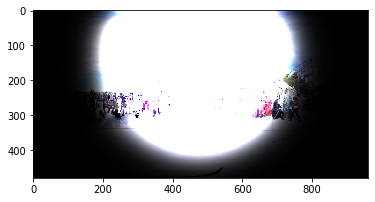

In [70]:
# Applying the gaussian mask
result = np.multiply(test_mask, test_image)
plt.imshow(result)

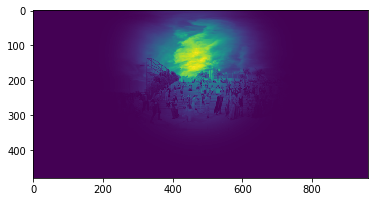

In [80]:
# only one channel
plt.imshow(result[:,:,0])